## Exploratory of Trametinib 24hr expt1 files, preprocessing and clustering

Barcodes, classification, genes and matrix exploring based on <a href="https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html#Preprocessing-and-clustering-3k-PBMCs" target="_blank">Scanpy Preprocessing and clustering tutorial</a>.

Download <a href="https://ndownloader.figshare.com/files/18716339?private_link=139f64b495dea9d88c70" target="_blank">MIX-seq data</a>.

In [1]:
import pandas as pd
import scanpy as sc

In [2]:
barcodes = pd.read_csv('../data/Trametinib_24hr_expt1/barcodes.tsv', sep='\t', index_col=None, header=None)

In [3]:
barcodes

,0
0,AAACCTGCATCTCGCT-1
1,AAACCTGCATGATCCA-1
2,AAACCTGCATGCAATC-1
3,AAACCTGGTCAGAATA-1
4,AAACCTGTCCGTAGTA-1
...,...
3072,TTTGTCAAGGGATCTG-1
3073,TTTGTCACATAAGACA-1
3074,TTTGTCATCACTGGGC-1
3075,TTTGTCATCCGCGCAA-1


In [4]:
classification = pd.read_csv('../data/Trametinib_24hr_expt1/classifications.csv', sep=',', index_col=0, header=0)

In [5]:
classification

,singlet_ID,num_SNPs,singlet_dev,singlet_dev_z,singlet_margin,singlet_z_margin,doublet_z_margin,tot_reads,doublet_dev_imp,doublet_CL1,doublet_CL2,percent.mito,cell_det_rate,cell_quality,doublet_GMM_prob,DepMap_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGCATCTCGCT-1,IALM_LUNG,608,0.666619,12.271054,0.496702,10.791358,0.239386,1112,0.004417,IALM_LUNG,CCFSTTG1_CENTRAL_NERVOUS_SYSTEM,8.243569,0.100849,normal,5.664152e-06,ACH-000672
AAACCTGCATGATCCA-1,SKMEL2_SKIN,470,0.572717,11.861979,0.391739,10.020636,0.418149,735,0.006244,SKMEL2_SKIN,BICR6_UPPER_AERODIGESTIVE_TRACT,9.270899,0.089330,normal,3.518547e-05,ACH-001190
AAACCTGCATGCAATC-1,SH10TC_STOMACH,1231,0.736257,9.700396,0.486640,7.947137,0.519175,2488,0.002855,SH10TC_STOMACH,RCM1_LARGE_INTESTINE,3.990357,0.160708,normal,1.024685e-06,ACH-000764
AAACCTGGTCAGAATA-1,SQ1_LUNG,845,0.784185,14.359282,0.582935,12.948476,0.102353,1675,0.002390,SQ1_LUNG,DKMG_CENTRAL_NERVOUS_SYSTEM,10.476488,0.128420,normal,9.073711e-07,ACH-000553
AAACCTGTCCGTAGTA-1,BICR31_UPPER_AERODIGESTIVE_TRACT,479,0.751766,18.918260,0.589823,16.883936,1.429195,829,0.009580,BICR31_UPPER_AERODIGESTIVE_TRACT,LS1034_LARGE_INTESTINE,4.313313,0.092148,normal,4.290294e-04,ACH-000228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGGATCTG-1,IALM_LUNG,971,0.746886,9.663852,0.521032,7.917529,0.209492,1997,0.001563,IALM_LUNG,RCC10RGB_KIDNEY,5.904187,0.136139,normal,5.516130e-08,ACH-000672
TTTGTCACATAAGACA-1,NCIH2347_LUNG,765,0.702755,12.983125,0.503927,11.511961,0.054732,1546,0.002465,NCIH2347_LUNG,CAOV3_OVARY,4.155429,0.112919,normal,2.701651e-07,ACH-000875
TTTGTCATCACTGGGC-1,SKMEL2_SKIN,514,0.721500,9.025784,0.482420,7.334451,0.423401,1129,0.005020,SKMEL2_SKIN,NCIH2347_LUNG,7.535861,0.093067,normal,1.812364e-05,ACH-001190


In [6]:
genes = pd.read_csv('../data/Trametinib_24hr_expt1/genes.tsv', sep='\t', header=None, index_col=0)

In [7]:
genes

,1
0,
ENSG00000243485,MIR1302-10
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000238009,RP11-34P13.7
ENSG00000239945,RP11-34P13.8
...,...
ENSG00000215635,AC145205.1
ENSG00000268590,BAGE5
ENSG00000251180,CU459201.1


In [8]:
mtx = pd.read_csv('../data/Trametinib_24hr_expt1/matrix.mtx', sep=' ', header=1, index_col=None)

In [9]:
mtx

,32738,3077,10324223
0,41,1,4
1,43,1,1
2,54,1,4
3,61,1,1
4,68,1,5
...,...,...,...
10324218,32704,3077,3
10324219,32706,3077,42
10324220,32707,3077,3
10324221,32708,3077,1


In [10]:
adata = sc.read_10x_mtx('../data/Trametinib_24hr_expt1/')

In [11]:
adata

AnnData object with n_obs × n_vars = 3077 × 32738
    var: 'gene_ids'

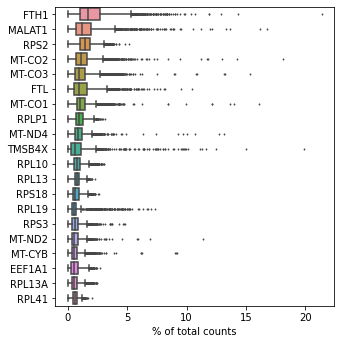

In [12]:
sc.pl.highest_expr_genes(adata, n_top=20,)

## Creating dataframe

In [13]:
adata.strings_to_categoricals()

In [14]:
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACCTGCATCTCGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCATGATCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCATGCAATC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTCAGAATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGTCCGTAGTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGGATCTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TTTGTCACATAAGACA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCACTGGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCCGCGCAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Basic filtering, marking mitochondrial genes

Filtering out cells that contain less than 200 detected genes. Filtering out genes that have been detected in less than 3 cells.

In [15]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Annotating the group of mitochondrial genes as 'mt', then filtering out mitochondrial genes.

In [15]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with 

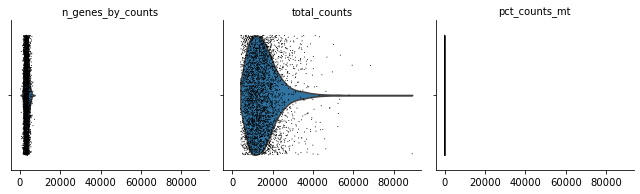

In [16]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

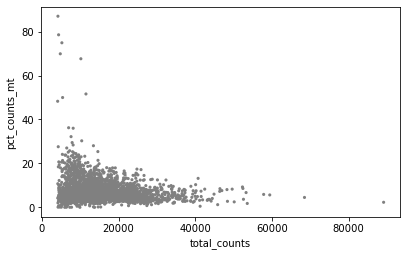

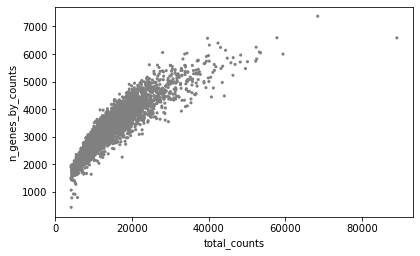

In [17]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

Removing cells that contain too many total counts or mithocondrial genes expressed based on the graphs above.

In [18]:
adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

Normalizing and logarithmizing.

In [19]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [20]:
sc.pp.log1p(adata)

Identifying and filtering highly-variable genes.

In [22]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

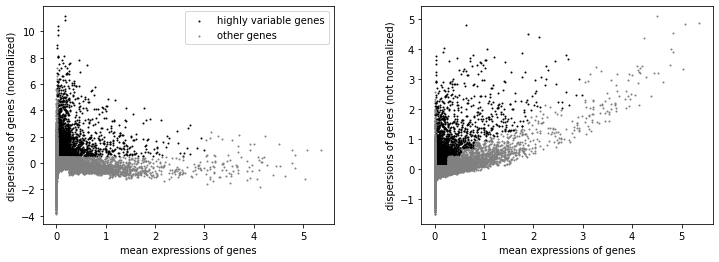

In [23]:
sc.pl.highly_variable_genes(adata)

In [24]:
adata.raw = adata

In [25]:
adata = adata[:, adata.var.highly_variable]  

Regressing out the influence of total counts per cell and the percentage of expressed mitochondrial genes. Scaling and cutting out data greater than standard deviation 10.

In [26]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) 

In [27]:
sc.pp.scale(adata, max_value=10)

## PCA

Running principal component analysis (PCA) to display the main axes of variation and reduce noise in data.

In [29]:
sc.tl.pca(adata, svd_solver='arpack') 

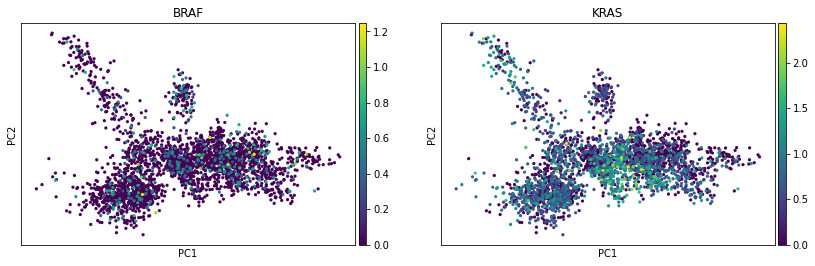

In [31]:
sc.pl.pca(adata, color=[ 'BRAF', 'KRAS'])

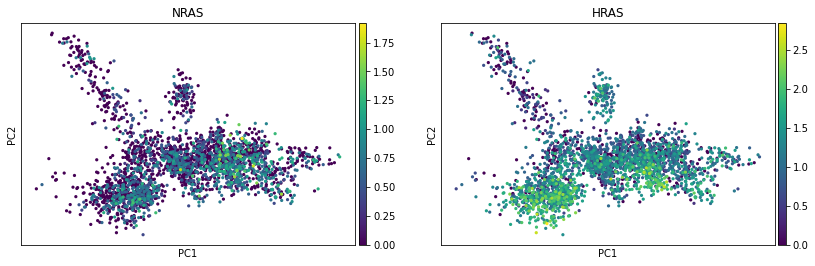

In [32]:
sc.pl.pca(adata, color=[ 'NRAS', 'HRAS'])  

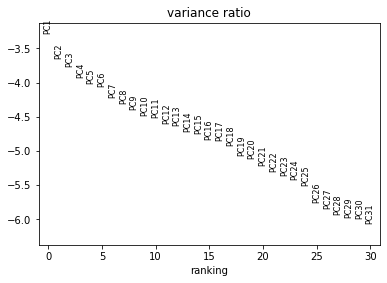

In [33]:
sc.pl.pca_variance_ratio(adata, log=True) 

In [34]:
print(sorted(list(adata.var_names)))

['A1BG', 'A2M', 'AARD', 'ABCA1', 'ABCA7', 'ABCB1', 'ABCB5', 'ABCC3', 'ABCC4', 'ABCD1', 'ABHD2', 'ABL2', 'ABLIM1', 'ABLIM3', 'ABTB2', 'AC002310.12', 'AC004988.1', 'AC006262.5', 'AC007040.11', 'AC009133.12', 'AC009336.24', 'AC009495.3', 'AC010967.2', 'AC011294.3', 'AC013275.2', 'AC018464.3', 'AC018816.3', 'AC018890.6', 'AC073218.2', 'AC073283.4', 'AC074389.5', 'AC079466.1', 'AC084018.1', 'AC090627.1', 'AC092669.3', 'AC104654.2', 'AC110619.2', 'AC131056.5', 'ACACA', 'ACP5', 'ACSL5', 'ACSS1', 'ACTA2', 'ACTG2', 'ACY3', 'ADAM12', 'ADAM19', 'ADAM8', 'ADAMTS1', 'ADAMTS2', 'ADAMTS5', 'ADAMTS6', 'ADD3', 'ADIRF', 'ADM', 'ADRB2', 'AEBP1', 'AF121898.3', 'AFAP1', 'AFAP1-AS1', 'AFP', 'AGR2', 'AGT', 'AHNAK2', 'AIF1L', 'AIM1', 'AK5', 'AKAP12', 'AKAP6', 'AKAP7', 'AKR1B1', 'AKR1B10', 'AKR1C1', 'AKR1C2', 'AKR1C3', 'AL109763.2', 'AL589743.1', 'AL592284.1', 'ALDH1A1', 'ALDH1A2', 'ALDH1A3', 'ALDH1L1', 'ALDH1L2', 'ALDH2', 'ALDH3A1', 'ALDH3A2', 'ALDH3B2', 'ALDH7A1', 'ALG1L', 'ALOX15B', 'ALPK2', 'ALPP', 'ALPPL2

Computing neighborhood graph, embedding the graph in two dimensions using <a href="https://arxiv.org/abs/1802.03426" target="_blank">UMAP</a>.

In [35]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [36]:
sc.tl.umap(adata)

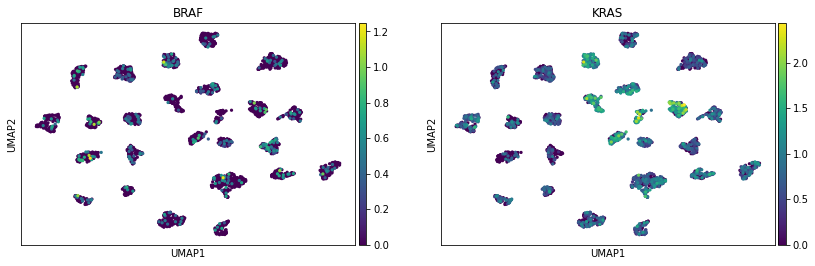

In [37]:
sc.pl.umap(adata, color=['BRAF', 'KRAS', ])  

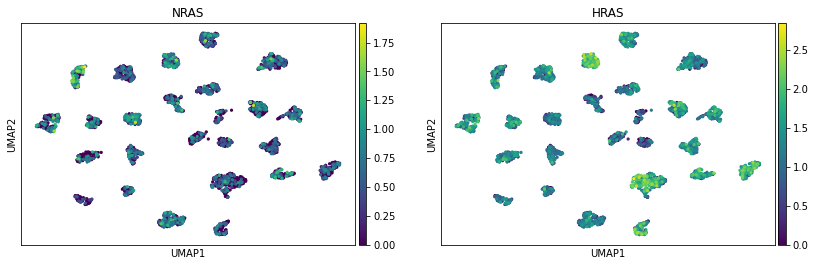

In [38]:
sc.pl.umap(adata, color=[ 'NRAS', 'HRAS'])  

## Clustering the neighborhood graph

In [43]:
sc.tl.leiden(adata)

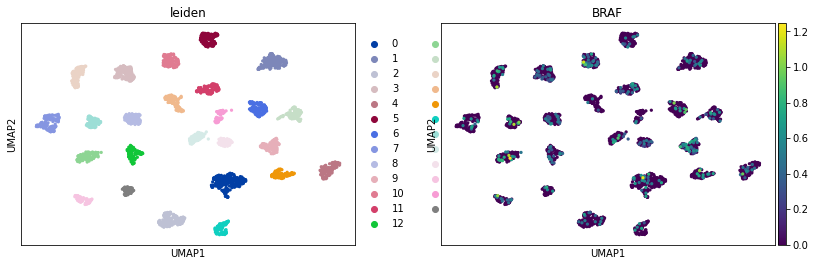

In [47]:
sc.pl.umap(adata, color=['leiden', 'BRAF' ])

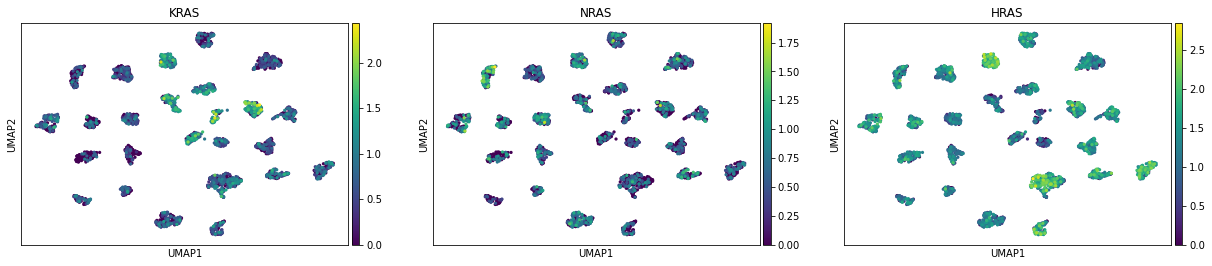

In [46]:
sc.pl.umap(adata, color=['KRAS','NRAS', 'HRAS'])

## Cell line annotation

Using **classification.csv** as metadata.

In [58]:
celllines = classification.singlet_ID.tolist()
test_celllist = list(set(celllines))
test_celllist.sort()
print(test_celllist)

['BICR31_UPPER_AERODIGESTIVE_TRACT', 'BICR6_UPPER_AERODIGESTIVE_TRACT', 'BT474_BREAST', 'BT549_BREAST', 'CAOV3_OVARY', 'CCFSTTG1_CENTRAL_NERVOUS_SYSTEM', 'COLO680N_OESOPHAGUS', 'COV434_OVARY', 'DKMG_CENTRAL_NERVOUS_SYSTEM', 'IALM_LUNG', 'LNCAPCLONEFGC_PROSTATE', 'LS1034_LARGE_INTESTINE', 'NCIH226_LUNG', 'NCIH2347_LUNG', 'RCC10RGB_KIDNEY', 'RCM1_LARGE_INTESTINE', 'RERFLCAD1_LUNG', 'SH10TC_STOMACH', 'SKMEL2_SKIN', 'SKMEL3_SKIN', 'SNU1079_BILIARY_TRACT', 'SQ1_LUNG', 'TEN_ENDOMETRIUM', 'UMUC1_URINARY_TRACT']


In [50]:
meta = classification

In [51]:
meta.head()

,singlet_ID,num_SNPs,singlet_dev,singlet_dev_z,singlet_margin,singlet_z_margin,doublet_z_margin,tot_reads,doublet_dev_imp,doublet_CL1,doublet_CL2,percent.mito,cell_det_rate,cell_quality,doublet_GMM_prob,DepMap_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGCATCTCGCT-1,IALM_LUNG,608,0.666619,12.271054,0.496702,10.791358,0.239386,1112,0.004417,IALM_LUNG,CCFSTTG1_CENTRAL_NERVOUS_SYSTEM,8.243569,0.100849,normal,5.664152e-06,ACH-000672
AAACCTGCATGATCCA-1,SKMEL2_SKIN,470,0.572717,11.861979,0.391739,10.020636,0.418149,735,0.006244,SKMEL2_SKIN,BICR6_UPPER_AERODIGESTIVE_TRACT,9.270899,0.089330,normal,3.518547e-05,ACH-001190
AAACCTGCATGCAATC-1,SH10TC_STOMACH,1231,0.736257,9.700396,0.486640,7.947137,0.519175,2488,0.002855,SH10TC_STOMACH,RCM1_LARGE_INTESTINE,3.990357,0.160708,normal,1.024685e-06,ACH-000764
AAACCTGGTCAGAATA-1,SQ1_LUNG,845,0.784185,14.359282,0.582935,12.948476,0.102353,1675,0.002390,SQ1_LUNG,DKMG_CENTRAL_NERVOUS_SYSTEM,10.476488,0.128420,normal,9.073711e-07,ACH-000553
AAACCTGTCCGTAGTA-1,BICR31_UPPER_AERODIGESTIVE_TRACT,479,0.751766,18.918260,0.589823,16.883936,1.429195,829,0.009580,BICR31_UPPER_AERODIGESTIVE_TRACT,LS1034_LARGE_INTESTINE,4.313313,0.092148,normal,4.290294e-04,ACH-000228


In [52]:
adata.obs.head()

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AAACCTGCATCTCGCT-1,3298,15796.0,1301.0,8.236262,11
AAACCTGCATGATCCA-1,2919,9550.0,885.0,9.267015,15
AAACCTGGTCAGAATA-1,4199,19241.0,2014.0,10.467232,2
AAACCTGTCCGTAGTA-1,3014,10473.0,451.0,4.306312,0
AAACCTGTCTGCGGCA-1,2846,10165.0,331.0,3.256271,19


In [53]:
adata.obs['Cell type'] = meta.loc[adata.obs.index, 'singlet_ID']

In [54]:
adata.obs.head()

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,Cell type
AAACCTGCATCTCGCT-1,3298,15796.0,1301.0,8.236262,11,IALM_LUNG
AAACCTGCATGATCCA-1,2919,9550.0,885.0,9.267015,15,SKMEL2_SKIN
AAACCTGGTCAGAATA-1,4199,19241.0,2014.0,10.467232,2,SQ1_LUNG
AAACCTGTCCGTAGTA-1,3014,10473.0,451.0,4.306312,0,BICR31_UPPER_AERODIGESTIVE_TRACT
AAACCTGTCTGCGGCA-1,2846,10165.0,331.0,3.256271,19,DKMG_CENTRAL_NERVOUS_SYSTEM


... storing 'Cell type' as categorical


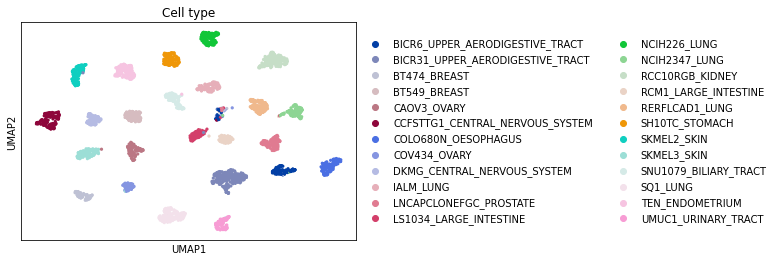

In [55]:
sc.pl.umap(adata, color='Cell type')

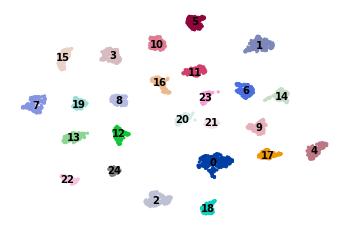

In [56]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [57]:
list(adata.obs['Cell type'].unique())

['IALM_LUNG',
 'SKMEL2_SKIN',
 'SQ1_LUNG',
 'BICR31_UPPER_AERODIGESTIVE_TRACT',
 'DKMG_CENTRAL_NERVOUS_SYSTEM',
 'BT474_BREAST',
 'TEN_ENDOMETRIUM',
 'COLO680N_OESOPHAGUS',
 'CAOV3_OVARY',
 'SKMEL3_SKIN',
 'NCIH226_LUNG',
 'LNCAPCLONEFGC_PROSTATE',
 'RCC10RGB_KIDNEY',
 'BICR6_UPPER_AERODIGESTIVE_TRACT',
 'BT549_BREAST',
 'SH10TC_STOMACH',
 'CCFSTTG1_CENTRAL_NERVOUS_SYSTEM',
 'RERFLCAD1_LUNG',
 'UMUC1_URINARY_TRACT',
 'RCM1_LARGE_INTESTINE',
 'LS1034_LARGE_INTESTINE',
 'SNU1079_BILIARY_TRACT',
 'NCIH2347_LUNG',
 'COV434_OVARY']